# Preprocessing

In [3]:
# importing libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [4]:
metadata=pd.read_csv('/content/movies_metadata.csv')

In [5]:
metadata.sample(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
42962,False,NaN,10000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,388202,tt5580536,en,Arsenal,After the deadbeat brother of a businessman is...,...,2017-01-06,0.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Brotherhood has its price.,Arsenal,False,5.0,24.0
38883,False,NaN,0,"[{'id': 16, 'name': 'Animation'}, {'id': 878, ...",NaN,118792,tt0982856,ru,Будет ласковый дождь,Animated short based on a short story from Ray...,...,1984-01-01,0.0,10.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,There Will Come Soft Rains,False,7.0,7.0
23075,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,191104,tt2504404,nl,Wolf,A young boxer is making a name for himself ins...,...,2013-09-11,0.0,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Wolf,False,6.6,16.0
38372,False,NaN,11000,"[{'id': 99, 'name': 'Documentary'}]",http://www.kevincarterfilm.com/,214187,tt0439676,en,The Death of Kevin Carter: Casualty of the Ban...,"In 1994, a South African photojournalist recei...",...,2004-09-17,0.0,27.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Death of Kevin Carter: Casualty of the Ban...,False,0.0,0.0
5098,False,"{'id': 135441, 'name': 'Road to Collection', '...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,13861,tt0032993,en,Road to Singapore,Bing Crosby an Bob Hope star in the first of t...,...,1940-03-22,0.0,85.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Ready For Fun . . Fight . . or a South Seas Ro...,Road to Singapore,False,6.7,12.0


In [6]:
metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [7]:
# analyze one row
metadata.iloc[0]

,0
adult,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ..."
budget,30000000
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
homepage,http://toystory.disney.com/toy-story
id,862
imdb_id,tt0114709
original_language,en
original_title,Toy Story
overview,"Led by Woody, Andy's toys live happily in his ..."


 ## Intial Preprocessing

In [8]:
# preprocessing
metadata.iloc[0]['belongs_to_collection']

"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}"

In [9]:
# we need only name for now
ast.literal_eval(metadata.iloc[0]['belongs_to_collection'])['name']

'Toy Story Collection'

In [10]:
type(metadata.iloc[0]['genres'])

str

In [11]:
# we need only genre keywords form this collection
# convert str into list object
for i in ast.literal_eval(metadata.iloc[0]['genres']):
  print(i['name'])

Animation
Comedy
Family


In [12]:
metadata.iloc[0]['overview']

"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences."

In [13]:
metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [14]:
# Extract data for simple content based filter recommandation
cont=metadata.drop(['budget','homepage','poster_path', 'production_companies',
       'production_countries','revenue','video'],axis=1)
cont.sample(5)

,adult,belongs_to_collection,genres,id,imdb_id,original_language,original_title,overview,popularity,release_date,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
14702,False,NaN,"[{'id': 99, 'name': 'Documentary'}, {'id': 107...",101376,tt1334556,en,Drottningen och jag,Filmmaker and Iranian exile Nahid Persson talk...,0.409213,2008-11-20,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,The Queen and I,5.0,3.0
31148,False,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",159763,tt2368537,es,A Nanny's Revenge,When Gina Meyers finds out that both of her pa...,0.373318,2012-10-20,0.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,A Nanny's Revenge,5.3,2.0
3977,False,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",10110,tt0092965,en,Empire of the Sun,"Jamie Graham, a privileged English boy, is liv...",10.220906,1987-12-09,153.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"To survive in a world at war, he must find a s...",Empire of the Sun,7.3,491.0
28344,False,"{'id': 161766, 'name': 'Gamera Films', 'poster...","[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",70322,tt0067123,ja,Gamera tai Shinkai kaijû Jigura,A moon base is destroyed by a spaceship with a...,0.598895,1971-07-17,87.0,[],Released,NaN,Gamera vs. Zigra,3.2,8.0
18318,False,NaN,"[{'id': 99, 'name': 'Documentary'}, {'id': 107...",56761,tt1822382,en,Reagan,Based on the story of Americas enigmatic caree...,0.190137,2011-02-07,0.0,[],Released,Marking Ronald Reagan's 100th Birthday,Reagan,5.2,5.0


In [15]:
cont['adult'].value_counts()

,count
adult,
False,45454
True,9
- Written by Ørnås,1
Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.,1
Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.,1


In [16]:
cont['belongs_to_collection'].value_counts()

,count
belongs_to_collection,
"{'id': 415931, 'name': 'The Bowery Boys', 'poster_path': '/q6sA4bzMT9cK7EEmXYwt7PNrL5h.jpg', 'backdrop_path': '/foe3kuiJmg5AklhtD3skWbaTMf2.jpg'}",29
"{'id': 421566, 'name': 'Totò Collection', 'poster_path': '/4ayJsjC3djGwU9eCWUokdBWvdLC.jpg', 'backdrop_path': '/jaUuprubvAxXLAY5hUfrNjxccUh.jpg'}",27
"{'id': 96887, 'name': 'Zatôichi: The Blind Swordsman', 'poster_path': '/8Q31DAtmFJjhFTwQGXghBUCgWK2.jpg', 'backdrop_path': '/bY8gLImMR5Pr9PaG3ZpobfaAQ8N.jpg'}",26
"{'id': 645, 'name': 'James Bond Collection', 'poster_path': '/HORpg5CSkmeQlAolx3bKMrKgfi.jpg', 'backdrop_path': '/6VcVl48kNKvdXOZfJPdarlUGOsk.jpg'}",26
"{'id': 37261, 'name': 'The Carry On Collection', 'poster_path': '/2P0HNrYgKDvirV8RCdT1rBSJdbJ.jpg', 'backdrop_path': '/38tF1LJN7ULeZAuAfP7beaPMfcl.jpg'}",25
...,...
"{'id': 285428, 'name': 'The Cutlass Collection', 'poster_path': '/sYbzfo3WQ0Ucp8Y3xlEPN1eOki3.jpg', 'backdrop_path': '/R2iGdq3MEXt6PeNQNTGtt2mHdy.jpg'}",1
"{'id': 267551, 'name': 'Aniskin Collection', 'poster_path': '/jgCfGd7CY95sRIe7QZOzkzc59d0.jpg', 'backdrop_path': '/rFVLwRq0ayZBDFheXTu2acJY1bQ.jpg'}",1
"{'id': 142686, 'name': 'Зимняя Вишня (трилогия)', 'poster_path': None, 'backdrop_path': None}",1


In [17]:
# finding collection
ast.literal_eval(cont['belongs_to_collection'].iloc[4])['name']

'Father of the Bride Collection'

In [18]:
cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   genres                 45466 non-null  object 
 3   id                     45466 non-null  object 
 4   imdb_id                45449 non-null  object 
 5   original_language      45455 non-null  object 
 6   original_title         45466 non-null  object 
 7   overview               44512 non-null  object 
 8   popularity             45461 non-null  object 
 9   release_date           45379 non-null  object 
 10  runtime                45203 non-null  float64
 11  spoken_languages       45460 non-null  object 
 12  status                 45379 non-null  object 
 13  tagline                20412 non-null  object 
 14  title                  45460 non-null  object 
 15  vo

In [19]:
cont.isnull().sum()

,0
adult,0
belongs_to_collection,40972
genres,0
id,0
imdb_id,17
original_language,11
original_title,0
overview,954
popularity,5
release_date,87


In [20]:
cont.columns

Index(['adult', 'belongs_to_collection', 'genres', 'id', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'release_date', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title', 'vote_average', 'vote_count'],
      dtype='object')

In [21]:
cont['original_language'].value_counts()

,count
original_language,
en,32269
fr,2438
it,1529
ja,1350
de,1080
...,...
sm,1
82.0,1
hy,1


In [22]:
cont['spoken_languages'].iloc[1]

"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}]"

In [23]:
cont['original_language'].iloc[1]

'en'

In [24]:
# No.of rows having same title and original title
pd.Series(cont['original_title']==cont['title']).value_counts()

,count
True,34064
False,11402


## prepraing dataset for recommandation purpose

In [25]:
data=cont.drop(columns=['imdb_id','runtime','status'],axis=1)

In [26]:
data.sample(5)

,adult,belongs_to_collection,genres,id,original_language,original_title,overview,popularity,release_date,spoken_languages,tagline,title,vote_average,vote_count
29431,False,NaN,"[{'id': 18, 'name': 'Drama'}]",154276,en,The Stone Boy,"One summer morning, 12-year-old Arnold Hillerm...",0.481371,1984-04-04,"[{'iso_639_1': 'en', 'name': 'English'}]",In one fatal moment he stood alone. His silenc...,The Stone Boy,5.7,3.0
42457,False,NaN,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",431458,ru,Рыба-мечта,Roman is a born proofreader from a family of p...,0.36801,2016-12-22,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",NaN,Dreamfish,0.0,0.0
36310,False,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",361183,nl,Terug naar morgen,What would you do if you could change the past?,0.404432,2015-09-30,"[{'iso_639_1': 'nl', 'name': 'Nederlands'}]",NaN,Sum of Histories,10.0,1.0
8157,False,NaN,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",10905,en,The Man with One Red Shoe,A man is mistaken as a spy by the CIA when he ...,4.006022,1985-07-18,"[{'iso_639_1': 'en', 'name': 'English'}]","Mugged, bugged, chased and seduced. Why is eve...",The Man with One Red Shoe,5.4,74.0
23308,False,NaN,"[{'id': 18, 'name': 'Drama'}]",71721,sv,Il capitano,The film is based on a true occurrence in Swed...,0.000578,1991-11-15,"[{'iso_639_1': 'fi', 'name': 'suomi'}, {'iso_6...",NaN,Il Capitano: A Swedish Requiem,5.8,4.0


In [27]:
ast.literal_eval(cont['spoken_languages'].iloc[6])

[{'iso_639_1': 'fr', 'name': 'Français'},
 {'iso_639_1': 'en', 'name': 'English'}]

In [28]:
type(cont['spoken_languages'].iloc[4])

str

In [29]:
data.columns

Index(['adult', 'belongs_to_collection', 'genres', 'id', 'original_language',
       'original_title', 'overview', 'popularity', 'release_date',
       'spoken_languages', 'tagline', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [30]:
data[data[['title', 'vote_average', 'vote_count']].isna().all(axis=1)]

,adult,belongs_to_collection,genres,id,original_language,original_title,overview,popularity,release_date,spoken_languages,tagline,title,vote_average,vote_count
19729,False,NaN,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",82663,en,Midnight Man,British soldiers force a recently captured IRA...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19730,- Written by Ørnås,0.065736,"[{'name': 'Carousel Productions', 'id': 11176}...",1997-08-20,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,1,NaN,NaN,NaN,NaN,NaN
29502,False,"{'id': 122661, 'name': 'Mardock Scramble Colle...","[{'id': 16, 'name': 'Animation'}, {'id': 878, ...",122662,ja,マルドゥック・スクランブル 排気,Third film of the Mardock Scramble series.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...",2012-09-29,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,12,NaN,NaN,NaN,NaN,NaN
35586,False,NaN,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 28,...",249260,en,Avalanche Sharks,A group of skiers are terrorized during spring...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...",2014-01-01,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Beware Of Frost Bites,22,NaN,NaN,NaN,NaN,NaN


In [31]:
data['belongs_to_collection'].dtype

dtype('O')

In [32]:
data['belongs_to_collection'].sample(5)

,belongs_to_collection
10476,"{'id': 1657, 'name': 'Zorro Collection', 'post..."
28802,NaN
41622,NaN
20975,NaN
32972,NaN


In [33]:
class preprocessing:
  def __init__(self,data):
    self.data=data

  def handling_null(self,col):
     self.data[col]=self.data[col].fillna('[]')

  def convert_to_str(self,col):
    self.data[col]=self.data[col].astype(str)

  def convert_to_object(self,value):
    try:
      return ast.literal_eval(value)
    except(ValueError,SyntaxError):
      return value

  def extract_name(self,col,is_multiple):
    # convert to object
    self.data[col]=self.data[col].apply(lambda x: self.convert_to_object(x))
    if is_multiple:
      self.data[col]=self.data[col].apply(lambda x: [i['name'] for i in x if isinstance(x,list)])
    else:
      self.data[col]=self.data[col].apply(lambda x: x['name'] if isinstance(x,dict) else np.nan)

  def day_to_yr(self,col):
    self.data[col]=pd.to_datetime(self.data[col])
    self.data[col]=self.data[col].dt.year

  def apply_preprocessing(self,col,is_multiple):
    self.handling_null(col)
    self.convert_to_str(col)
    self.extract_name(col,is_multiple)



In [34]:
# title,vote_count,vote_avg having all nan values drop it
data=data.dropna(subset=['title','vote_count','vote_average'],how='all')
# replace the rows of title from which original title from corrspending rows
data['title']=data['title'].fillna(data['original_title'])

In [35]:
# create object
pre=preprocessing(data)
pre.apply_preprocessing('belongs_to_collection',False)
pre.apply_preprocessing('genres',True)
pre.apply_preprocessing('spoken_languages',True)
pre.day_to_yr('release_date')

In [36]:
data['belongs_to_collection'].isnull().sum()

np.int64(40970)

In [37]:
data['belongs_to_collection'].shape
# belongs_to_collection used for filtering if anybody want from this collection only

(45460,)

In [38]:
data.isnull().sum()


,0
adult,0
belongs_to_collection,40970
genres,0
id,0
original_language,11
original_title,0
overview,954
popularity,0
release_date,84
spoken_languages,0


In [39]:
cosine_data=data.copy()

In [40]:
cosine_data.sample(5)

,adult,belongs_to_collection,genres,id,original_language,original_title,overview,popularity,release_date,spoken_languages,tagline,title,vote_average,vote_count
33198,False,NaN,[Western],126227,en,Desolation Canyon,"Following a bank robbery, the responsible gang...",0.570874,2006.0,[English],NaN,Desolation Canyon,6.0,2.0
32758,False,NaN,[Documentary],224894,en,The Man Whose Mind Exploded,"In this ""beautifully intimate and utterly uniq...",0.743082,2014.0,[English],NaN,The Man Whose Mind Exploded,6.0,5.0
12993,False,NaN,"[Thriller, Horror, Mystery]",20015,es,KM 31: Kilometro 31,While driving through the kilometer 31 of a lo...,1.701171,2006.0,[Español],NaN,KM 31: Kilometer 31,5.2,23.0
13971,False,NaN,[Comedy],20071,es,Pagafantas,Pagafantas (from Latin pag-fantas paying fanta...,0.82522,2009.0,[Español],NaN,Pagafantas,5.2,10.0
44062,False,NaN,"[Comedy, Drama]",203780,ru,Igra v Pravdu,Four old friends decide to have a meeting in o...,1.187998,2013.0,[Pусский],NaN,The Game of Truth,5.2,7.0


In [41]:
cosine_data.isnull().sum()

,0
adult,0
belongs_to_collection,40970
genres,0
id,0
original_language,11
original_title,0
overview,954
popularity,0
release_date,84
spoken_languages,0


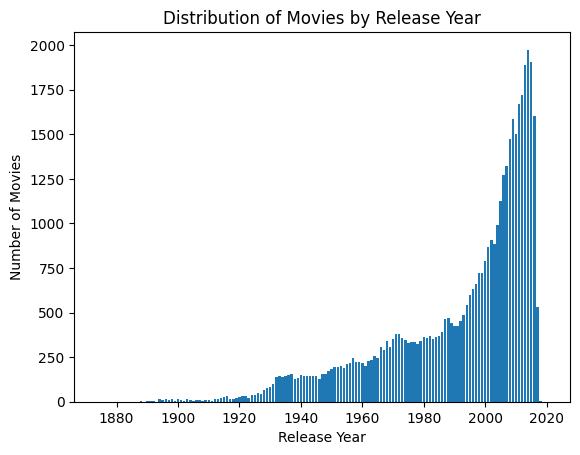

In [42]:
# distribution of release_data
release_counts=cosine_data['release_date'].value_counts()
plt.bar(release_counts.index, release_counts.values)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies by Release Year')
plt.show()

In [43]:
# converting relase_date into bins
bins = [1880,1900,1920,1940,1960,1980,2000,2005,2010,2015,2020]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
cosine_data['year_bins'] = pd.cut(cosine_data['release_date'], bins=bins, labels=labels, include_lowest=True)


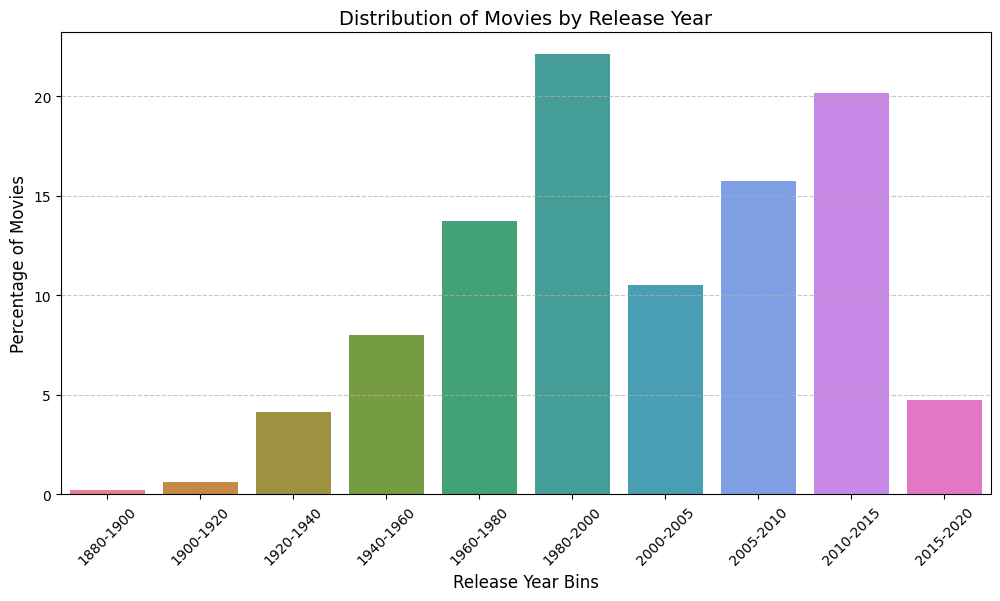

In [44]:
year_counts = cosine_data['year_bins'].value_counts(normalize=True) * 100  # Percentage
year_counts = year_counts.sort_index()  # Sort by year

# Plot
plt.figure(figsize=(12, 6))
colors = sns.color_palette("husl", len(year_counts))  # Generate distinct colors
sns.barplot(x=year_counts.index, y=year_counts.values, palette=colors)

plt.xlabel("Release Year Bins", fontsize=12)
plt.ylabel("Percentage of Movies", fontsize=12)
plt.title("Distribution of Movies by Release Year", fontsize=14)
plt.xticks(rotation=45)  # Rotate x labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better visualization

plt.show()


In [45]:
# for better recommandation we should drop 1880-1900 movies
cosine_data = cosine_data[cosine_data['year_bins'] != '(1880, 1900]']

In [46]:
# tag_line and belong_to_collection
cosine_data[cosine_data[['tagline', 'overview','belongs_to_collection']].isna().all(axis=1)]

,adult,belongs_to_collection,genres,id,original_language,original_title,overview,popularity,release_date,spoken_languages,tagline,title,vote_average,vote_count,year_bins
32,False,NaN,"[Romance, Adventure]",78802,fr,"Guillaumet, les ailes du courage",NaN,0.745542,1996.0,[English],NaN,Wings of Courage,6.8,4.0,1980-2000
300,False,NaN,"[Drama, Comedy]",161495,sv,Roommates,NaN,3.395867,1995.0,[English],NaN,Roommates,6.4,7.0,1980-2000
634,False,NaN,[Comedy],287305,de,Peanuts – Die Bank zahlt alles,NaN,0.066123,1996.0,[],NaN,Peanuts – Die Bank zahlt alles,4.0,1.0,1980-2000
635,False,NaN,[Comedy],339428,de,Happy Weekend,NaN,0.002229,1996.0,[Deutsch],NaN,Happy Weekend,0.0,0.0,1980-2000
641,False,NaN,[Comedy],10801,de,Das Superweib,NaN,0.821299,1996.0,[Deutsch],NaN,The Superwife,5.3,7.0,1980-2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45342,False,NaN,[Drama],199887,en,Over/Under,NaN,0.704642,2013.0,[English],NaN,Over/Under,4.0,2.0,2010-2015
45377,False,NaN,[Adventure],317389,es,Simbad e il califfo di Bagdad,NaN,0.006352,1973.0,[Italiano],NaN,Simbad e il califfo di Bagdad,0.0,0.0,1960-1980
45398,False,NaN,"[Romance, Comedy]",468707,fi,Lauri Mäntyvaaran tuuheet ripset,NaN,0.347806,2017.0,[suomi],NaN,Thick Lashes of Lauri Mäntyvaara,8.0,1.0,2015-2020
45399,False,NaN,"[Crime, Comedy]",280422,ru,Все и сразу,NaN,0.201582,2014.0,[Pусский],NaN,All at Once,6.0,4.0,2010-2015


In [47]:
cosine_data.drop(index=cosine_data[cosine_data[['tagline', 'overview','belongs_to_collection']].isna().all(axis=1)].index,inplace=True)

## Extract tagline from overview

In [48]:
cosine_data['overview'][1]

"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures."

In [49]:
cosine_data['tagline'][1]

'Roll the dice and unleash the excitement!'

In [54]:
from transformers import pipeline

generator = pipeline("text-generation", model="gpt2")

def generate_tagline_hf(overview):

    prompt = f"Create a catchy movie tagline:\n\n{overview}\n\nTagline:"

    tagline = generator(prompt, max_new_tokens=15, num_return_sequences=1)[0]['generated_text'].split("\n")[-1]

    return tagline.strip()

# Apply only to rows where 'tagline' is NaN
cosine_data.loc[cosine_data['tagline'].isna(), 'tagline'] = cosine_data.loc[cosine_data['tagline'].isna(), 'overview'].apply(lambda x: generate_tagline_hf(x) if pd.notna(x) else None)


Device set to use cuda:0


In [52]:
cosine_data.isnull().sum()

,0
adult,0
belongs_to_collection,40083
genres,0
id,0
original_language,10
original_title,0
overview,67
popularity,0
release_date,71
spoken_languages,0


In [53]:
cosine_data.to_csv('modified.csv')

In [55]:
# filling original_language with spoken_language
def first_language(value):
  if len(value)>0:
    return value[0]
  else:
    return np.nan

# original language and spoken language
cosine_data['original_language']=cosine_data['original_language'].fillna(cosine_data['spoken_languages'].apply(first_language ))

In [56]:
cosine_data.sample(5)

,adult,belongs_to_collection,genres,id,original_language,original_title,overview,popularity,release_date,spoken_languages,tagline,title,vote_average,vote_count,year_bins
40508,False,NaN,"[Drama, Romance]",339419,en,Loving,"The story of Richard and Mildred Loving, an in...",7.977391,2016.0,[English],All love is created equal,Loving,6.5,275.0,2015-2020
12642,False,NaN,"[Thriller, Horror, Mystery]",10665,en,The Strangers,"After returning from a wedding reception, a co...",8.845536,2008.0,[English],Lock the door. Pretend you're safe.,The Strangers,6.0,509.0,2005-2010
36154,False,NaN,"[TV Movie, Drama, Family]",367536,en,A Gift Wrapped Christmas,"Personal shopper Gwen's newest client, Charlie...",1.218718,2015.0,"[English, Français]",A character,A Gift Wrapped Christmas,6.1,7.0,2010-2015
738,False,NaN,[Documentary],255546,pt,Carmen Miranda: Bananas Is My Business,A biography of the Portuguese-Brazilian singer...,0.146287,1995.0,"[English, Português]","Tagline: Carmen Miranda's book, Carmen Miranda...",Carmen Miranda: Bananas Is My Business,10.0,1.0,1980-2000
21140,False,NaN,[Drama],127373,en,What Maisie Knew,"Based on the Henry James novella, the story fr...",8.535611,2013.0,[English],Based on the novel by Henry James,What Maisie Knew,7.4,149.0,2010-2015
